In [6]:
import pandas as pd
import matplotlib.pyplot as plt

votes = pd.read_csv("digg2009/digg_votes.csv", header = None)

print(votes.head())

            0     1  2
0  1246573330   318  1
1  1246603391   399  1
2  1246573479  1749  1
3  1246599553  1964  1
4  1246568035  4362  1


#### Digg_Votes
The `votes` table has the following columns:
 - 0: Unix time stamp of the vote
 - 1: Unique id of the voter
 - 2: Unique id of the story

In [7]:
#finding all votes for article 2 
votes_2 = votes[votes[2] == 2]

print(votes_2)

              0       1  2
583  1246570320     503  2
584  1246570719    1008  2
585  1246608751    2403  2
586  1246567786    4868  2
587  1246583024    5220  2
..          ...     ... ..
969  1246645599  331664  2
970  1246572912  332472  2
971  1246569360  334281  2
972  1246643837  334986  2
973  1246559790  335404  2

[391 rows x 3 columns]


In [8]:
#sorting the timesteps 
votes_2 = votes_2.sort_values(by=[0])

print(votes_2.head())

              0       1  2
973  1246559790  335404  2
726  1246559950  128200  2
853  1246559950  233095  2
921  1246559969  281734  2
746  1246559973  147725  2


In [9]:
#counting how many votes for each timestep
votes_2 = votes_2.groupby([0], as_index = False).count()
print(votes_2.head())

            0  1  2
0  1246559790  1  1
1  1246559950  2  2
2  1246559969  1  1
3  1246559973  1  1
4  1246560316  1  1


In [13]:
import numpy as np
timesteps = (votes_2.loc[:,0]).values
timesteps = np.concatenate(([1246559790], timesteps))
print(timesteps)

[1246559790 1246559790 1246559950 1246559969 1246559973 1246560316
 1246560379 1246560417 1246560534 1246560585 1246560593 1246560688
 1246560691 1246560823 1246560922 1246561176 1246561309 1246561339
 1246561565 1246561582 1246561682 1246561752 1246561810 1246561972
 1246562144 1246562205 1246562206 1246562302 1246562985 1246563023
 1246563143 1246563298 1246563618 1246563732 1246563785 1246564107
 1246564121 1246564507 1246564918 1246565039 1246565100 1246565242
 1246565431 1246565581 1246565642 1246565727 1246565743 1246566113
 1246566778 1246566832 1246566870 1246566876 1246566884 1246566964
 1246567157 1246567162 1246567431 1246567714 1246567749 1246567786
 1246567831 1246567857 1246567908 1246568459 1246568482 1246568513
 1246568525 1246568857 1246568977 1246569033 1246569106 1246569111
 1246569134 1246569152 1246569171 1246569225 1246569257 1246569286
 1246569297 1246569348 1246569352 1246569358 1246569360 1246569399
 1246569405 1246569456 1246569480 1246569491 1246569517 124656

In [14]:
normal_array = (timesteps- np.min(timesteps))/(np.max(timesteps) - np.min(timesteps))
print(normal_array)

[0.00000000e+00 0.00000000e+00 6.85615361e-04 7.67032185e-04
 7.84172569e-04 2.25396050e-03 2.52392155e-03 2.68675520e-03
 3.18811143e-03 3.40665133e-03 3.44093209e-03 3.84801621e-03
 3.86087150e-03 4.42650418e-03 4.85072868e-03 5.93914307e-03
 6.50906084e-03 6.63761372e-03 7.60604541e-03 7.67889205e-03
 8.10740165e-03 8.40735837e-03 8.65589394e-03 9.35007949e-03
 1.00871160e-02 1.03485069e-02 1.03527920e-02 1.07641612e-02
 1.36908817e-02 1.38537154e-02 1.43679269e-02 1.50321168e-02
 1.64033475e-02 1.68918485e-02 1.71189586e-02 1.84987595e-02
 1.85587508e-02 2.02127979e-02 2.19739723e-02 2.24924689e-02
 2.27538598e-02 2.33623434e-02 2.41722266e-02 2.48149910e-02
 2.50763818e-02 2.54406150e-02 2.55091765e-02 2.70946621e-02
 2.99442509e-02 3.01756461e-02 3.03384797e-02 3.03641903e-02
 3.03984711e-02 3.07412788e-02 3.15683023e-02 3.15897278e-02
 3.27424186e-02 3.39551008e-02 3.41050791e-02 3.42636277e-02
 3.44564570e-02 3.45678695e-02 3.47864094e-02 3.71474973e-02
 3.72460545e-02 3.737889

In [15]:
voter_ids = (votes_2.loc[:,1]).values
print(voter_ids)

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
import numpy as np
y1_array = np.zeros(len(voter_ids)+1)
                   
for i in range(0, len(voter_ids)):
    y1_array[i+1] = y1_array[i] + voter_ids[i]
    
print(y1_array)

[  0.   1.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  99. 100.
 101. 102. 103. 104. 105. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 133. 134. 135. 136. 137. 139. 140. 141. 142. 143. 144.
 145. 146. 147. 148. 149. 150. 151. 152. 153. 155. 156. 157. 158. 159.
 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 

In [17]:
y2_array = 391-y1_array
print(y2_array)

print(len(y2_array))

[391. 390. 388. 387. 386. 385. 384. 383. 382. 381. 380. 379. 378. 377.
 376. 375. 374. 373. 372. 371. 370. 369. 368. 367. 366. 365. 364. 363.
 362. 361. 360. 359. 358. 357. 356. 355. 354. 353. 352. 351. 350. 349.
 348. 347. 346. 345. 344. 343. 341. 340. 339. 338. 337. 336. 335. 334.
 333. 332. 331. 330. 329. 328. 327. 326. 325. 324. 323. 322. 321. 320.
 319. 318. 317. 316. 315. 314. 313. 312. 311. 310. 309. 308. 307. 306.
 305. 304. 303. 302. 301. 300. 299. 298. 297. 296. 295. 294. 292. 291.
 290. 289. 288. 287. 286. 284. 283. 282. 281. 280. 279. 278. 277. 276.
 275. 274. 273. 272. 271. 270. 269. 268. 267. 266. 265. 264. 263. 262.
 261. 260. 259. 258. 257. 256. 255. 254. 252. 251. 250. 249. 248. 247.
 246. 245. 244. 243. 242. 241. 240. 239. 238. 236. 235. 234. 233. 232.
 231. 230. 229. 228. 227. 226. 225. 224. 223. 222. 221. 220. 219. 218.
 217. 216. 215. 214. 213. 212. 211. 210. 209. 208. 207. 206. 205. 204.
 203. 202. 201. 200. 199. 198. 197. 196. 195. 194. 193. 192. 191. 190.
 189. 

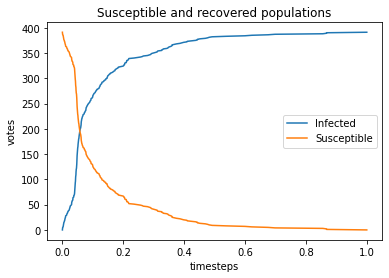

In [18]:
import matplotlib.pyplot as plt
# line 1 points
x1 = normal_array
y1 = y1_array
# plotting the line 1 points 
plt.plot(x1, y1, label = "Infected")
# line 2 points
x2 = normal_array
y2 = y2_array
# plotting the line 2 points 
plt.plot(x2, y2, label = "Susceptible")
plt.xlabel('timesteps')
# Set the y axis label of the current axis.
plt.ylabel('votes')
# Set a title of the current axes.
plt.title('Susceptible and recovered populations')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()